## Problem Description


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we will analyse what sorts of people were likely to survive. We will apply the tools of machine learning to predict which passengers survived the tragedy.

## Dataset

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set will be used to build the machine learning models. For the training set, the outcome (also known as the “ground truth”) for each passenger is provided. Our model will be based on “features” like passengers’ gender and class. 

The test set will be used to see how well the model performs on unseen data. For each passenger in the test set, using the model we trained to predict whether or not they survived the sinking of the Titanic.

Datasets used - 

train data - train.csv 

test data - test.csv

In [1]:
#Importing the required packages for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

        Read train and test datasets - train.csv, test.csv

In [2]:
#Reading csv file
train = pd.read_csv('train.csv',encoding = 'ISO-8859-1')
test = pd.read_csv('test.csv',encoding = 'ISO-8859-1')

#to print all the columns, set the max_columns to 500
pd.set_option('display.max_columns', 500)

#Finding the no of rows and columns in test and train datasets
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
#Full Summary of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#Full Summary of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


`There are 7 numerical variables and 5 categorical variables`

In [5]:
#Description of the train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Description of the test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
#Reading the first n rows of the train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Reading the first n rows of the test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
#Percentage of null values in each column
#train dataset
print(round((train.isnull().sum() * 100/ len(train)),2).sort_values(ascending=False))

#test dataset
print(round((test.isnull().sum() * 100/ len(train)),2).sort_values(ascending=False))

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64
Cabin          36.70
Age             9.65
Fare            0.11
Embarked        0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64


In [10]:
#Finding the rows having null values
print(train.isnull().any(axis=1).sum())
print(test.isnull().any(axis=1).sum())

708
331


In [11]:
#Imputing 'Age' with median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
#Imputing 'Embarked' with previous values
train['Embarked'] = train['Embarked'].fillna(method='ffill')
test['Embarked'] = test['Embarked'].fillna(method='ffill')

The column `cabin` has 77% null values in train dataset and 36% in test dataset, so it is imputed with 'NA'

In [12]:
#Replacing column 'Cabin' with NA for missing values
train['Cabin'] = train['Cabin'].replace(np.nan, 'NA')
print(train.info())

test['Cabin'] = test['Cabin'].replace(np.nan, 'NA')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [13]:
#Let's see the first few rows of the test dataset after treating null values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S


In [14]:
#Let's see the first few rows of the test dataset after treating null values
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S


`Next step is to treat categorical variables by changing them to numeric and dummy variables wherever required`

In [15]:
#Map Cabin values - 0 for NA (no cabin) and 1 for others (has cabin)
def check_cabin(cabin):
    if cabin == 'NA':
        return 1
    else:
        return 0

train['Cabin'] = train["Cabin"].apply(check_cabin)    
test['Cabin'] = test["Cabin"].apply(check_cabin)  

#Map Sibsp values - 0 for no siblings/spouse and 1 for passengers with siblings/spouse
def check_sibsp(sbsp):
    if sbsp > 1:
        return 1
    else:
        return 0

train['SibSp'] = train["SibSp"].apply(check_sibsp)    
test['SibSp'] = test["SibSp"].apply(check_sibsp)

#Map Parch values - 0 for no parents/children and 1 for passengers with parents/children
def check_parch(parch):
    if parch > 1:
        return 1
    else:
        return 0

train['Parch'] = train["Parch"].apply(check_parch)    
test['Parch'] = test["Parch"].apply(check_parch) 

In [16]:
#Creating a bin for Age
age_bin = [0, 15, 30, 45, 60, 75, 100]
age = ['1', '2', '3','4', '5','6']
train['Age'] = pd.cut(train['Age'], age_bin, labels=age)
test['Age'] = pd.cut(test['Age'], age_bin, labels=age)

In [17]:
#Mapping Names to titles
#First split the name, and extract the titles
def title(name):
    title_n = name.split(', ')[1]
    title_n = title_n.split('.')[0]

    return title_n

train['Title'] = train['Name'].apply(title)
test['Title'] = test['Name'].apply(title)

#Mapping the extracted titles
def new_feat(train):
    if train.Title == 'Mr':
        return 1
    elif train.Title == 'Mme':
        return 2
    elif train.Title == 'Ms':
        return 3
    elif train.Title == 'Mlle':
        return 3
    else:
        return 4
    
train['Title'] = train.apply(new_feat, axis = 1)
test['Title'] = test.apply(new_feat, axis = 1)

In [18]:
#Similarly a bin for Fare
#minimum value of fare is 7.91 and the max being 512.33
def new_fare(train):
    if train.Fare <= 7.91:
        return '1'
    elif train.Fare > 7.91 and train.Fare < 14.45:
        return '2'
    elif train.Fare > 14.45 and train.Fare < 31:
        return '3'
    elif train.Fare > 31:
        return '4'
    else:
        return '0'
    
train['Fare'] = train.apply(new_fare, axis = 1)
test['Fare'] = test.apply(new_fare, axis = 1)

        Dropping variables which will not be useful in our prediction

In [19]:
#Dropping variables Ticket and Name
train = train.drop(['Name','Ticket'], axis=1)
print(train.info())

test = test.drop(['Name','Ticket'], axis=1)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null category
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null object
Cabin          891 non-null int64
Embarked       891 non-null object
Title          891 non-null int64
dtypes: category(1), int64(7), object(3)
memory usage: 70.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null category
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null object
Cabin          418 non-null int64
Embarked       418 non-null object
Title          418 non-null i

### Encoding categorical variables

In [20]:
#encode categorical variables using LabelEncoder
#import LabelEncoder from sklearn package
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
#encoding categorical variables in train dataset
train['Sex'] = le.fit_transform(train['Sex'])
train['Embarked'] = le.fit_transform(train['Embarked'])
train['Age'] = le.fit_transform(train['Age'])
train['Fare'] = le.fit_transform(train['Fare'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,1,1,0,0,1,1,2,1
1,2,1,1,0,2,0,0,4,0,0,4
2,3,1,3,0,1,0,0,2,1,2,4
3,4,1,1,0,2,0,0,4,0,2,4
4,5,0,3,1,2,0,0,2,1,2,1


In [22]:
#encoding categorical variables in test dataset
test['Sex'] = le.fit_transform(test['Sex'])
test['Embarked'] = le.fit_transform(test['Embarked'])
test['Age'] = le.fit_transform(test['Age'])
test['Fare'] = le.fit_transform(test['Fare'])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,892,3,1,2,0,0,1,1,1,1
1,893,3,0,3,0,0,1,1,2,4
2,894,2,1,4,0,0,2,1,1,1
3,895,3,1,1,0,0,2,1,2,1
4,896,3,0,1,0,0,2,1,2,4


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#features to scale
num_vars = ['Title', 'Pclass', 'Age', 'Parch', 'Embarked','Cabin','SibSp', 'Fare']

train[num_vars] = scaler.fit_transform(train[num_vars])
test[num_vars] = scaler.fit_transform(test[num_vars])

In [24]:
#Description of the train dataset after encoding
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,0.654321,0.647587,0.278114,0.083053,0.106622,0.623737,0.771044,0.766554,0.417883
std,257.353842,0.486592,0.418036,0.477990,0.174572,0.276117,0.308805,0.281789,0.420397,0.396535,0.492475
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.500000,0.000000,0.200000,0.000000,0.000000,0.250000,1.000000,0.500000,0.000000
50%,446.000000,0.000000,1.000000,1.000000,0.200000,0.000000,0.000000,0.750000,1.000000,1.000000,0.000000
75%,668.500000,1.000000,1.000000,1.000000,0.400000,0.000000,0.000000,0.750000,1.000000,1.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
#Description of the test dataset after encoding
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.632775,0.636364,0.278469,0.059809,0.100478,0.620813,0.782297,0.700957,0.425040
std,120.810458,0.420919,0.481622,0.174558,0.237416,0.300997,0.288255,0.413179,0.427248,0.494403
min,892.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,0.000000,0.200000,0.000000,0.000000,0.250000,1.000000,0.500000,0.000000
50%,1100.500000,1.000000,1.000000,0.200000,0.000000,0.000000,0.750000,1.000000,1.000000,0.000000
75%,1204.750000,1.000000,1.000000,0.400000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1309.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#Description of the train dataset after encoding
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null float64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null float64
Title          891 non-null float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 73.2 KB


In [27]:
#Description of the test dataset after encoding
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null float64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null float64
Title          418 non-null float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 31.1 KB


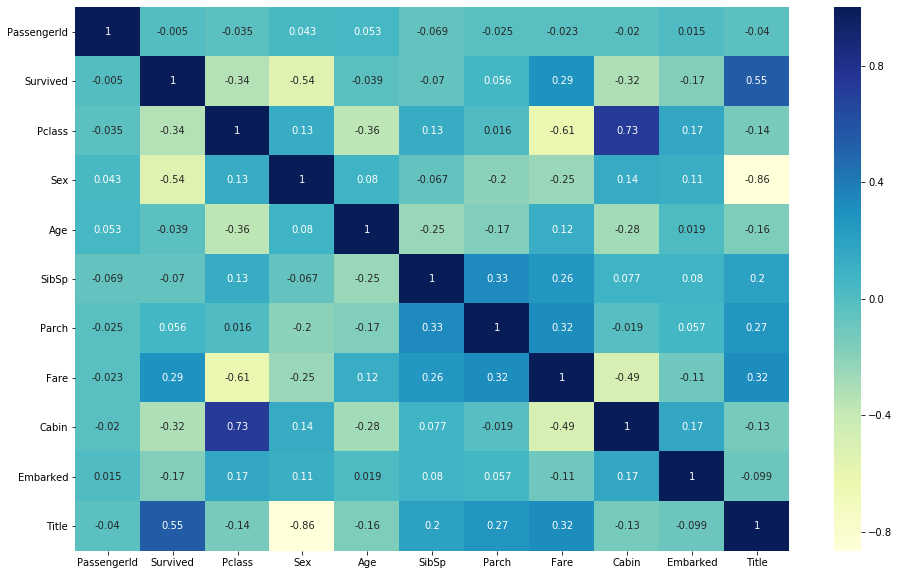

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

`Sex` and `Passenger Class` seems to be negatively correlated with `Survival` and `Fare` being positively correlated with `Survival`.  The variables `Pclass` and `Cabin` are highly correlated and could be dropped from our dataset.  But keeping this in the dataset to check how the model behaves.

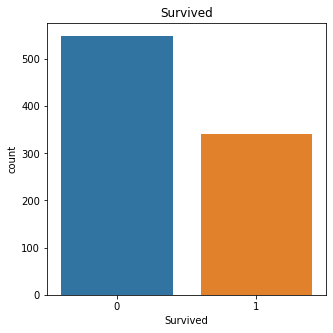

In [29]:
#Plotting the no of Survivals
plt.figure(figsize=(5, 5))
sns.countplot('Survived', data=train)
plt.title('Survived')
plt.show()

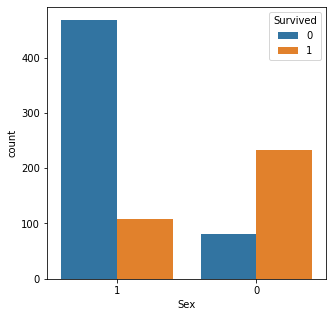

In [30]:
#Plotting no of Survivals by Sex
plt.figure(figsize=(5, 5))
sns.countplot(data = train, x='Sex', order=train['Sex'].value_counts().index, hue='Survived')
plt.show()

`Split the dataset to train and test and create X and y variables`

In [31]:
#Create variable X_train (independent variables) and y (dependent variable)
from sklearn.model_selection import train_test_split

X_all = train.drop(['Survived', 'PassengerId'], axis=1)
y_all = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20, random_state=25)

### Naive Bayes

In [32]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted = model.predict(X_test)
print("Predicted Value:", predicted)

Predicted Value: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0]


In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7877094972067039


In [34]:
#Validate with KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
print(kf)
def run_kfold(model):
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(train):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(model)

KFold(n_splits=10, random_state=None, shuffle=False)
Fold 1 accuracy: 0.8111111111111111
Fold 2 accuracy: 0.7078651685393258
Fold 3 accuracy: 0.7640449438202247
Fold 4 accuracy: 0.7752808988764045
Fold 5 accuracy: 0.797752808988764
Fold 6 accuracy: 0.7640449438202247
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.7640449438202247
Fold 9 accuracy: 0.8314606741573034
Fold 10 accuracy: 0.8089887640449438
Mean Accuracy: 0.7788639200998752


In [35]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[86, 26],
       [12, 55]], dtype=int64)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7877094972067039


In [37]:
ids = test['PassengerId']
predictions = model.predict(test.drop('PassengerId', axis=1))

# Generate Submission File
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions_nb.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


`The accuracy score is 78.7%.  From the confusion matrix, there are quite a number of false postivies and false negatives`

        Since the accuracy and confusion matrix is not that great, I will try with a couple of other algorithms to check if the accuracy could be better than this

### Random Forest

In [38]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8435754189944135


In [40]:
#Validate with KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
print(kf)
def run_kfold(rf):
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(train):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        rf.fit(X_train, y_train)
        predictions = rf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(rf)

KFold(n_splits=10, random_state=None, shuffle=False)
Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.8426966292134831
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.8314606741573034
Fold 5 accuracy: 0.8426966292134831
Fold 6 accuracy: 0.8651685393258427
Fold 7 accuracy: 0.8089887640449438
Fold 8 accuracy: 0.8202247191011236
Fold 9 accuracy: 0.8876404494382022
Fold 10 accuracy: 0.8651685393258427
Mean Accuracy: 0.8328339575530587


In [41]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[101,  11],
       [ 17,  50]], dtype=int64)

`The accuracy is 83.79% which is pretty good, and the confusion matrix also looks good`
        Let's check another algorithm to see if we get any better results

`Printing the output of Random Forest to csv file`

In [42]:
ids = test['PassengerId']
predictions = rf.predict(test.drop('PassengerId', axis=1))

# Generate Submission File
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions_RF.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


`Next we will check with Logistic Regression`

## Logistic Regression

In [43]:
from sklearn import datasets, linear_model, metrics 

# create logistic regression object 
reg = linear_model.LogisticRegression() 
   
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred_reg = reg.predict(X_test) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred_reg)*100) 

Logistic Regression model accuracy(in %): 82.12290502793296


D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
#Validate with KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
print(kf)
def run_kfold(reg):
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(train):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        reg.fit(X_train, y_train)
        predictions = reg.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(reg)

KFold(n_splits=10, random_state=None, shuffle=False)
Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.8426966292134831
Fold 3 accuracy: 0.7865168539325843
Fold 4 accuracy: 0.8539325842696629
Fold 5 accuracy: 0.8089887640449438
Fold 6 accuracy: 0.797752808988764
Fold 7 accuracy: 0.7752808988764045
Fold 8 accuracy: 0.7752808988764045
Fold 9 accuracy: 0.8764044943820225
Fold 10 accuracy: 0.8202247191011236
Mean Accuracy: 0.8137078651685392


D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\s

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_reg)

array([[99, 13],
       [19, 48]], dtype=int64)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_reg))

Accuracy: 0.8212290502793296


In [47]:
ids = test['PassengerId']
predictions = reg.predict(test.drop('PassengerId', axis=1))

# Generate Submission File
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions_LR.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


`The accuracy of this model is 82.68% and the confusion matrix looks good but the model created using random forest has a better accuracy and confusion matrix`

## Decision Tree

In [48]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.8324022346368715


In [49]:
#Validate with KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
print(kf)
def run_kfold(dt):
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(train):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        reg.fit(X_train, y_train)
        predictions = dt.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(dt)

D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\DS\anaconda\lib\s

KFold(n_splits=10, random_state=None, shuffle=False)
Fold 1 accuracy: 0.8777777777777778
Fold 2 accuracy: 0.8876404494382022
Fold 3 accuracy: 0.8202247191011236
Fold 4 accuracy: 0.898876404494382
Fold 5 accuracy: 0.9101123595505618
Fold 6 accuracy: 0.898876404494382
Fold 7 accuracy: 0.8764044943820225
Fold 8 accuracy: 0.8764044943820225
Fold 9 accuracy: 0.9213483146067416
Fold 10 accuracy: 0.8876404494382022
Mean Accuracy: 0.8855305867665418


D:\DS\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dt)

array([[102,  10],
       [ 20,  47]], dtype=int64)

`The accuracy is 83.24% which is pretty good, and the confusion matrix also looks good`

`Print output to CSV`

In [51]:
ids = test['PassengerId']
predictions = dt.predict(test.drop('PassengerId', axis=1))

# Generate Submission File
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions_DT.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


        Based on the accuracy score and confusion matrix, the Random Forest algorithm holds good, and hence the predictions from Random Forest is taken as final